<center>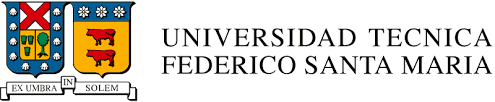</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 2  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Árboles y Bosques de Regresión
* Máquinas de ensamblado
* Redes Neuronales


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 2]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 30 de Junio, en horario de clases.
* Fecha de entrega: 01 de Julio. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression, SGDClassifier
from tabulate import tabulate

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, mean_absolute_error, mutual_info_score, r2_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, RandomForestClassifier


# 1. Predicción de la calidad de vinos

Los árboles de regresión, también conocidos como árboles de decisión para regresión, son un tipo de algoritmo de aprendizaje supervisado que se utiliza para predecir valores numéricos. Son una potente herramienta para tareas de regresión y ofrecen varias ventajas y consideraciones.

<center><img src=https://cdn.shopify.com/s/files/1/1277/3667/files/an-essential-guide-1_480x480.png?v=1674719515></center>


Los conjuntos de datos provienen del UCI Machine Learning Repository. Estos conjuntos de datos están relacionados con las variantes tintas y blancas del vino portugués "Vinho Verde".

Estos dos conjuntos de datos contienen varias propiedades químicas de distintos vinos, como la acidez, el pH, el contenido de alcohol, etc. La variable objetivo es la calidad del vino la cual se puntúa del 0 al 10. Puede considerarse una tarea de clasificación o regresión en la que las clases están ordenadas y no balanceadas. Para esta pregunta nos centraremos en la tarea de regresión.

Variables de entrada (basadas en pruebas físico-químicas):
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* tipo

Variable objetivo (basadas en datos sensoriales):
* quality



Para obtener más información sobre este conjunto de datos, revise el siguiente link: https://www.kaggle.com/datasets/rajyellow46/wine-quality.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Aplique lo aprendido en la tarea 1 y obtenga los datos de la forma que le sea más conveniente siempre y cuando estos sean los del link de la descripción.

In [2]:
# from google.colab import files
# files.upload()

In [3]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !kaggle datasets download -d rajyellow46/wine-quality

In [5]:
# !unzip /content/wine-quality.zip

In [6]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 1.1.1 Exploración del conjunto de datos

Explore el conjunto de datos y responda brevemente las siguientes preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

> b) ¿Existen datos faltantes, si es así en qué atributos faltan datos y cuantos faltan?
    
> c) ¿Qué técnicas conoce para rellenar los datos faltantes de los atributos del dataset? (si no conoce ninguna investigue al menos 2)




In [7]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps
datainfo(df)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
type,object,6497,2,0,0.000000
fixed acidity,float64,6487,106,10,0.153917
volatile acidity,float64,6489,187,8,0.123134
citric acid,float64,6494,89,3,0.046175
residual sugar,float64,6495,316,2,0.030783
chlorides,float64,6495,214,2,0.030783
free sulfur dioxide,float64,6497,135,0,0.000000
total sulfur dioxide,float64,6497,276,0,0.000000
density,float64,6497,998,0,0.000000
pH,float64,6488,108,9,0.138525


> a) Se observa que el tipo de vino corresponde a una variable categórica al igual que la variable objetivo, aunque esté compuesta por números, toma valores discretos dentro de un ranking de clasificación. Mientras que el resto de las variables corresponde a variables numéricas.

> b) En cuanto a los datos faltantes, se observan varios registros con datos tipo NaN, lo que indica que esos datos no están disponibles, por lo que sí hay datos faltantes y se muestran en la siguiente tabla:

In [8]:
nan_columns = df.columns[df.isna().any()]
nan_counts = df[nan_columns].isna().sum()

# Create a DataFrame with the NaN columns and their counts
nan_table = pd.DataFrame({'Atributo con registros vacíos': nan_columns,
                          'Número de registros vacíos': nan_counts})

# Print the NaN table
print(nan_table)

                 Atributo con registros vacíos  Número de registros vacíos
fixed acidity                    fixed acidity                          10
volatile acidity              volatile acidity                           8
citric acid                        citric acid                           3
residual sugar                  residual sugar                           2
chlorides                            chlorides                           2
pH                                          pH                           9
sulphates                            sulphates                           4


> c) A continuación se enumeran las técnicas investigadas:
>   >1) Si el dataset contiene numerosas filas con registros desconocidos o vacíos, entonces una opción es eliminar esas columnas, pues podrían considerarse como datos no válidos o no representativos de la situación que se desea capturar para entrenar el modelo.
>   >2) Si alguna "feature" en particular muestra gran catidad de registros vacíos, entonces una opción es entrenar al modelo sin la feature problemática, pues esa feature no está bien representada en el registro de datos para el dataset.
>   >3) Mean/median imputation: Consiste en, si el dataset muestra un número reducido de valores desconocidos, reemplazar los valores por la media o mediana (según sea el caso más representativo de la situación) del atributo o feature. Esta técnica asume que la pérdida de datos atiende a procesos completamente aleatorios (MCAR, "missinf completely at random"; por sus siglás en inglés) o a proceso aleatorios (MAR).
>   >4) Otra opción es estimar los datos mediante algún método de regressión o clasificación, conviertiendo estas features en target del modelo.



In [9]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 1.1.2 Exploración de Features

En problemas de regresión, el desbalance de la variable objetivo se refiere a una distribución desigual de los valores de la variable objetivo en el conjunto de datos. Esto significa que hay una presencia significativa de valores en una clase o rango de valores en comparación con otras clases o rangos de valores. Considerando lo anterior responda las siguientes preguntas:

> a) Grafique histogramas y box plots de cada variable y comente acerca de la distribución de las características y de la variable objetivo

> b) ¿Considera que están *balanceados* los valores de la variable objetivo?

> c) ¿Cómo afecta el desbalance en problemas de regresión en términos de la predicción y de la evaluación de un modelo?




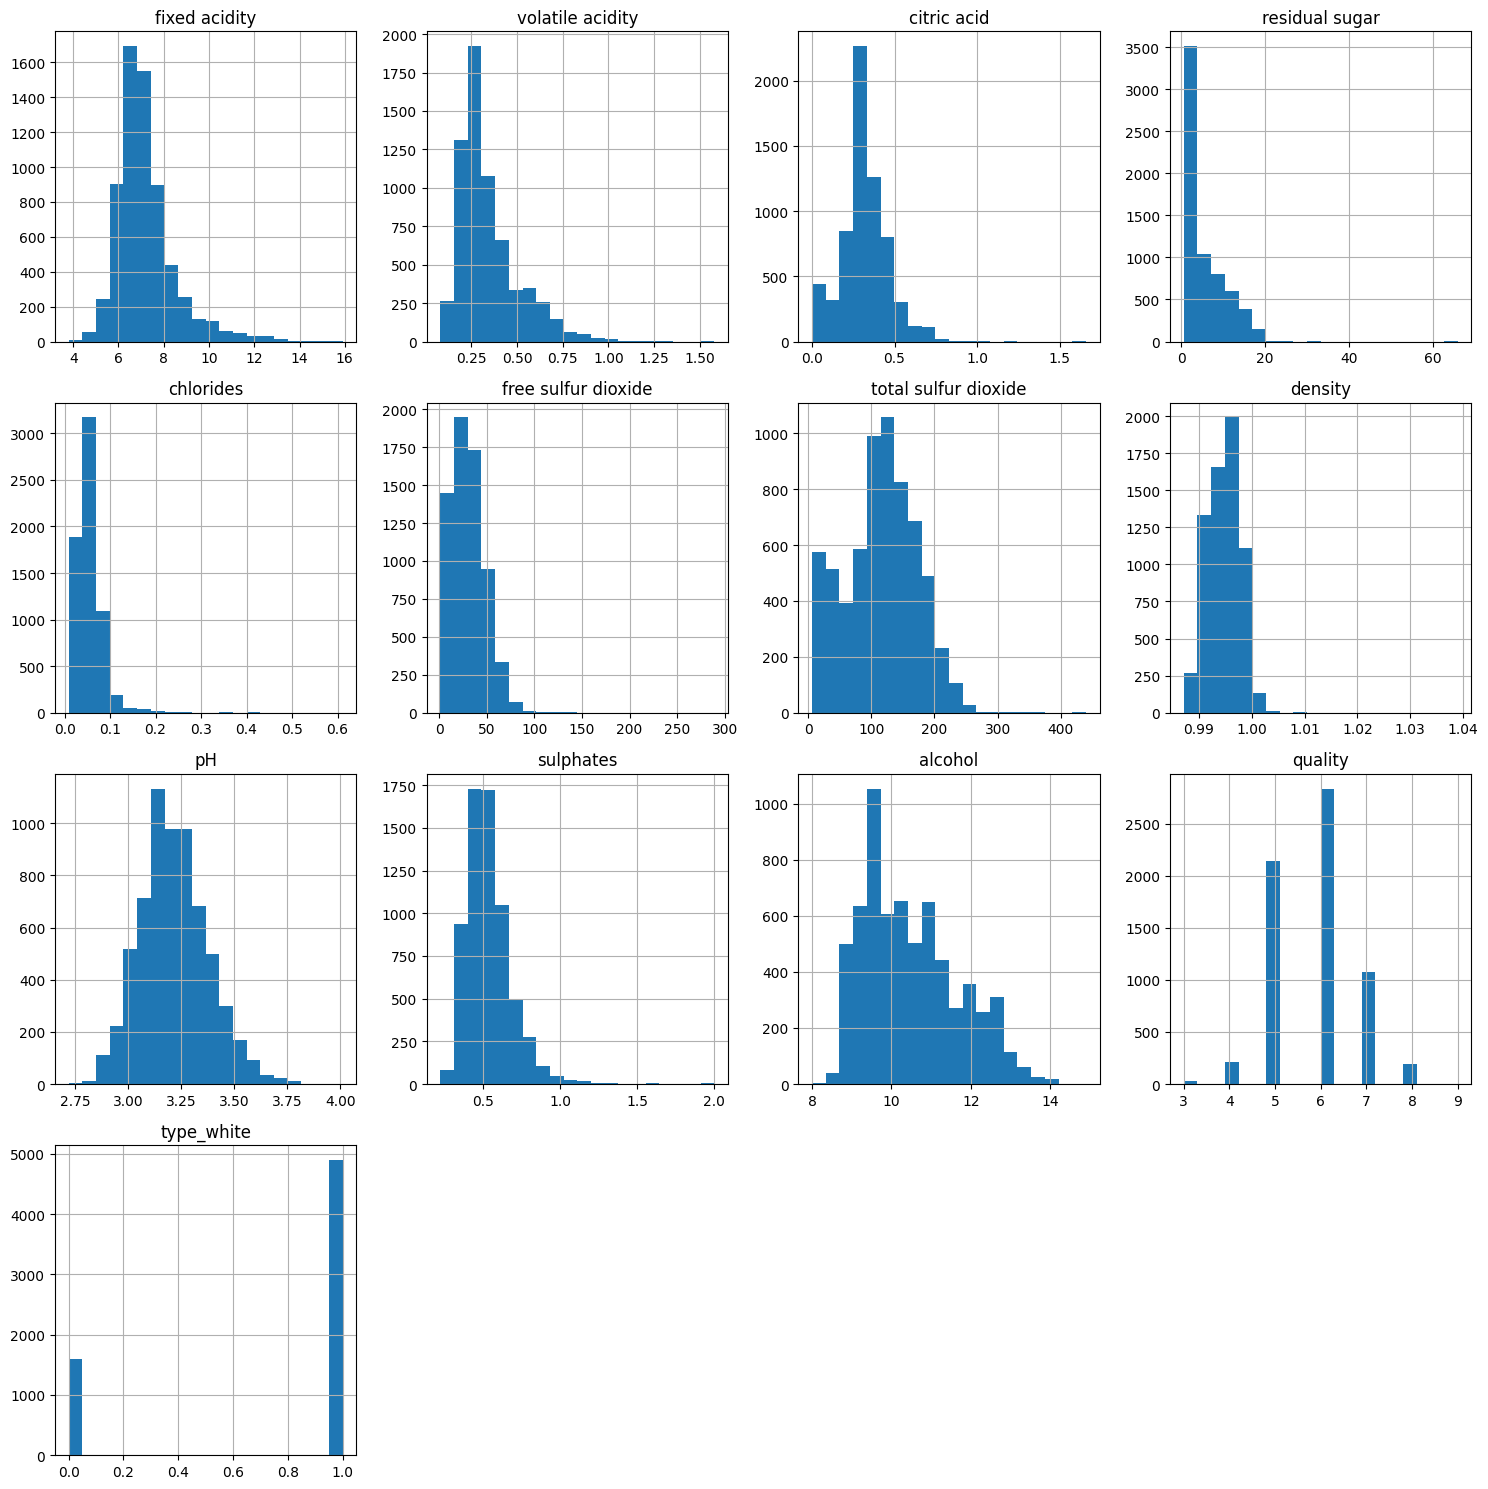

In [10]:
df = pd.get_dummies(df,drop_first=True)
df.hist(figsize=(15, 15), layout=(4, 4), bins=20)
plt.tight_layout()
plt.show()

fixed acidity              Axes(0.125,0.747241;0.133621x0.132759)
volatile acidity        Axes(0.285345,0.747241;0.133621x0.132759)
citric acid              Axes(0.44569,0.747241;0.133621x0.132759)
residual sugar          Axes(0.606034,0.747241;0.133621x0.132759)
chlorides               Axes(0.766379,0.747241;0.133621x0.132759)
free sulfur dioxide        Axes(0.125,0.587931;0.133621x0.132759)
total sulfur dioxide    Axes(0.285345,0.587931;0.133621x0.132759)
density                  Axes(0.44569,0.587931;0.133621x0.132759)
pH                      Axes(0.606034,0.587931;0.133621x0.132759)
sulphates               Axes(0.766379,0.587931;0.133621x0.132759)
alcohol                    Axes(0.125,0.428621;0.133621x0.132759)
quality                 Axes(0.285345,0.428621;0.133621x0.132759)
type_white               Axes(0.44569,0.428621;0.133621x0.132759)
dtype: object

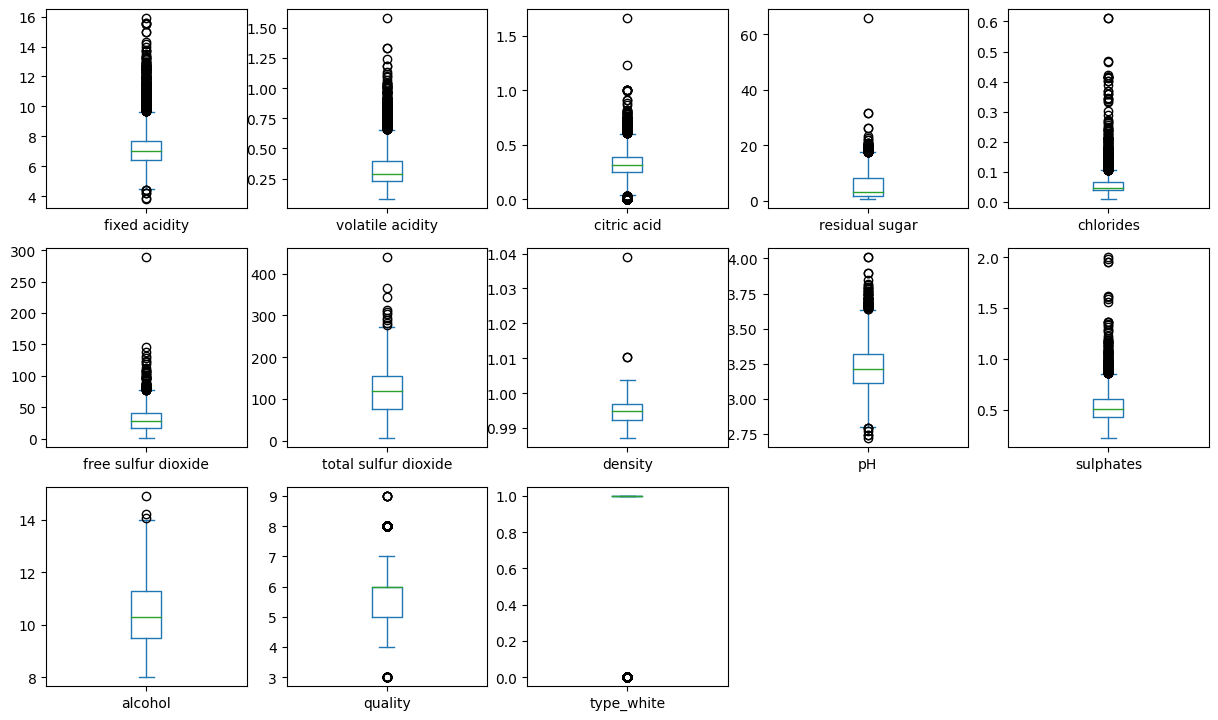

In [11]:
# buscar outliers con boxplots
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

<Axes: >

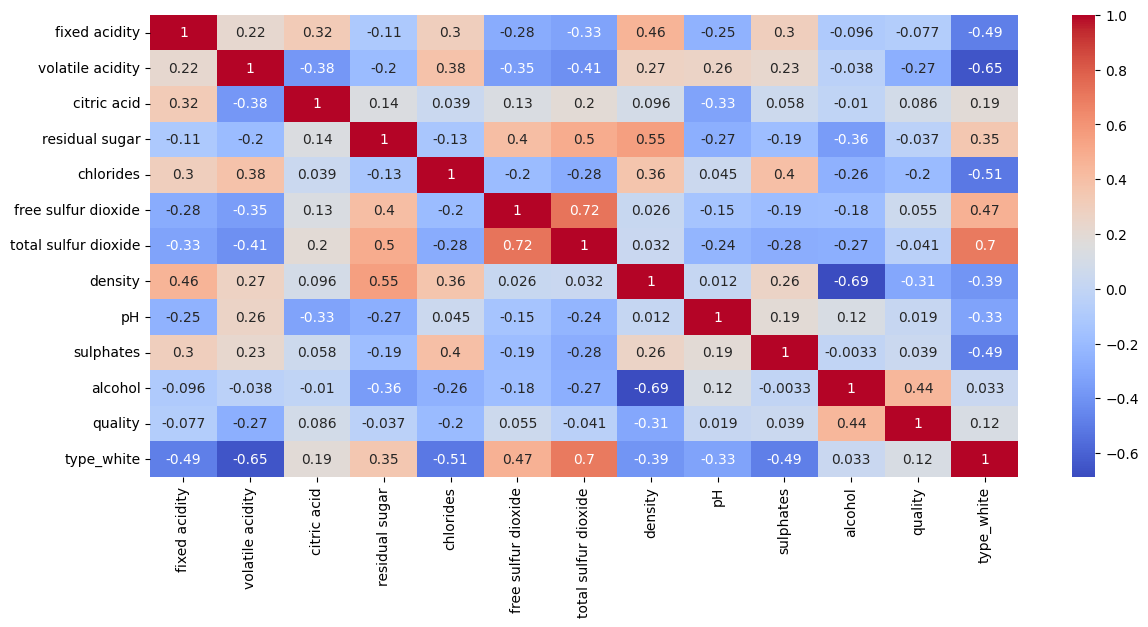

In [12]:
plt.figure(figsize=[14,6])
sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')

> a) Se observa que cada feature sigue una distribución distinta, marcada bastante por los valores extremos de cada uno. Lo anterior se observa en el histograma pero con mayor razón se observa en el diagrama de cajas.

> b) De acuerdo a lo expuesto, es visible que existe un *desbalance* en la distribución de los valores de las features.

> c) Hay varios aspectos en los que el *desbalance* puede afectar el desempeño de una predicción, a continuación se describen algunos:
>   >1) El bias del modelo se puede ver afectado por la dominancia de las instancias más numerosas en el dataset.
>   >2) Las métricas para evaluar el desempeño del modelo se podrían ver afectadas, por ejemplo, el *accurracy* podría verse afectado si el predictor tiene un alto índice de predicciones sobre la clase mayoritaria, aún cuando el modelo prediga erróneamente los datos extremos. Lo anterior vuelve más complejo la evaluación del desempeño de un predictor.
>   >3) Si el dataset muestra un *desbalance*, podría ser indicativo que su data es poco reprensentativa, induciendo *overfitting* al modelo, ajustando la predicción a los datos con mayor presencia y empobreciendo la capacidad de generalización del modelo.


### 1.1.3 Separación de conjuntos

> a) Separe el conjunto entre variables características y variable objetivo.

> b) Separe el conjunto de datos en un conjunto de entrenamiento y conjunto de prueba, utilizando una proporción 80%-20% respectivamente.

> c) Una vez separado los conjuntos, obtenga la media de cada variable con datos faltantes en el conjunto de **entrenamiento** y reemplace los valores faltantes (NaN) de ambos conjuntos (entrenamiento y prueba) con dicha media.

In [13]:
X = df.drop(['quality'], axis =1)
X_mod = X
y = df['quality']
y_mod = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Checking which columns have empty values
empty_columns = df.columns[df.isnull().any()].tolist()

# Create a table showing columns with empty values
empty_columns_table = pd.DataFrame({'Columns with Empty Values': empty_columns})

print(empty_columns_table)


  Columns with Empty Values
0             fixed acidity
1          volatile acidity
2               citric acid
3            residual sugar
4                 chlorides
5                        pH
6                 sulphates


In [15]:
# To check the process, the mean values before and after doing the replacement should be the same
column_means_before = X_train[empty_columns].mean()

# Replacing the NaN values of the df for the mean value of its column
for column in X_train.columns:
    if X_train[column].isna().any():
        column_mean = X_train[column].mean()
        X_train[column].fillna(column_mean, inplace=True)
        ### LLENADO DE X_TEST CON X_MEAN DEL TRAIN SET
        if X_test[column].isna().any():
            X_test[column].fillna(column_mean, inplace=True)
# Mean value after doing the replacement
column_means_after = X_train[empty_columns].mean()

#Checking the comparisson
comparison_X = pd.DataFrame({'Column Means (Before)': column_means_before,
                              'Column Means (After)': column_means_after})

# Print the comparison DataFrame
print(comparison_X)


                  Column Means (Before)  Column Means (After)
fixed acidity                  7.226156              7.226156
volatile acidity               0.340018              0.340018
citric acid                    0.319444              0.319444
residual sugar                 5.425115              5.425115
chlorides                      0.055922              0.055922
pH                             3.218356              3.218356
sulphates                      0.533421              0.533421


> d) Estandarice las variables categóricas numéricas no binarias, es decir, todas excepto el tipo de vino y la variable objetivo.

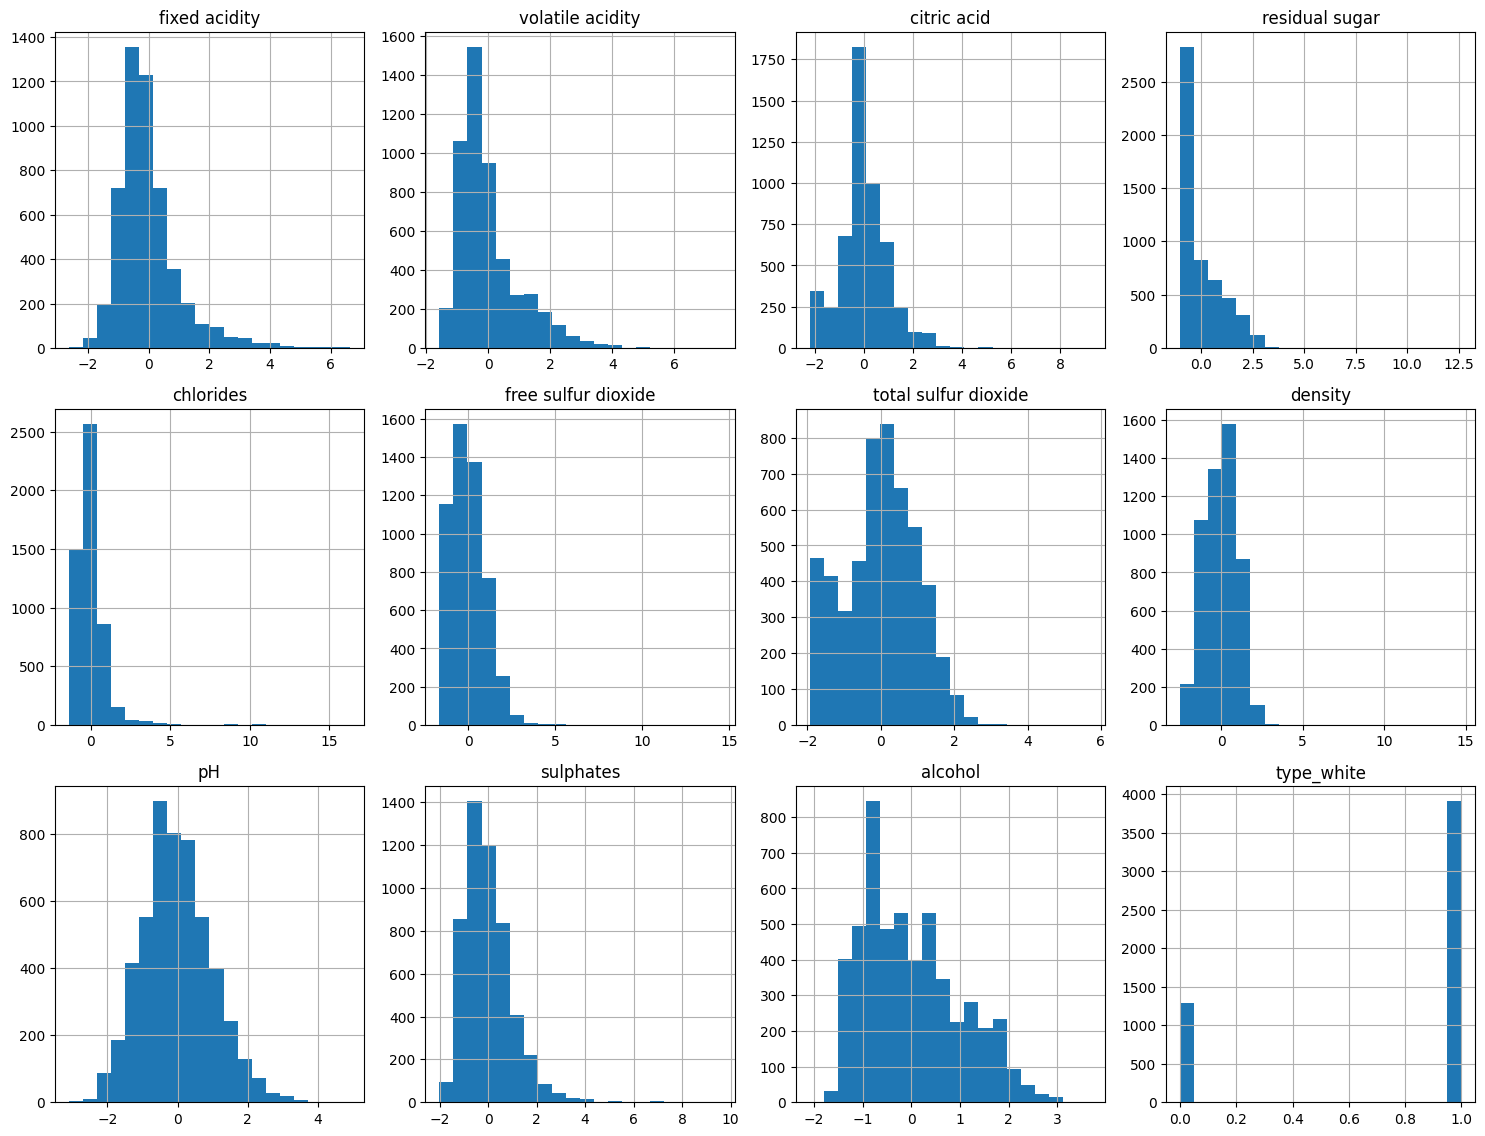

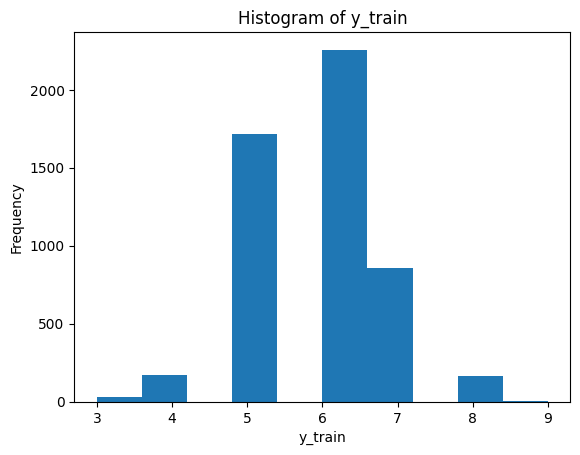

In [16]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = [col for col in X_train.columns if len(df[col].unique()) > 2]


for col in cols_to_normalize:
    X_train[col] = X_scaler.fit_transform(X_train[[col]])
    X_test[col] = X_scaler.transform(X_test[[col]])
X_train.hist(figsize=(15, 15), layout=(4, 4), bins=20)
plt.tight_layout()
plt.show()

plt.hist(y_train, bins=10)
plt.xlabel('y_train')
plt.ylabel('Frequency')
plt.title('Histogram of y_train')
plt.show()


e) Grafique la relevancia de cada variable con respecto a la variable objetivo utilizando la información mutua entre ambas, en otras palabras: MutualInformation($x_i,y$) siendo $x_i$ la $i$-ésima variable.

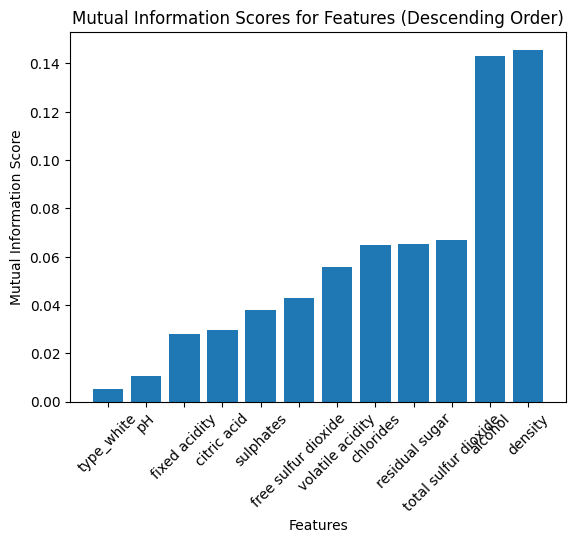

In [17]:
mi_scores = mutual_info_classif(X_train, y_train)
df_mi_scores = pd.DataFrame({'Features': X_train.columns, 'MI Scores': mi_scores})
df_mi_scores = df_mi_scores.sort_values(by='MI Scores', ascending=True)
# Create a bar plot of feature names and MI scores
fig, ax = plt.subplots()
ax.bar(df_mi_scores['Features'], df_mi_scores['MI Scores'])
ax.set_xlabel('Features')
ax.set_ylabel('Mutual Information Score')
ax.set_title('Mutual Information Scores for Features (Descending Order)')
plt.xticks(rotation=45)
plt.show()


> f) Cree un segundo conjunto quitando las características que menos aportan información según lo observado en su gráfico de la pregunta anterior. El número de características a quitar es algo que usted deberá escoger y argumentar por qué lo escogió. En adelante al conjunto con todas las variables lo llamaremos conjunto $\textit{A}$ y al nuevo conjunto creado con las características quitadas lo llamaremos conjunto $\textit{B}$.

In [18]:
df_mi_scores

,Features,MI Scores
11,type_white,0.005349
8,pH,0.010713
0,fixed acidity,0.028026
2,citric acid,0.029650
9,sulphates,0.037808
5,free sulfur dioxide,0.042733
1,volatile acidity,0.055913
4,chlorides,0.064797
3,residual sugar,0.065320
6,total sulfur dioxide,0.067081


In [19]:
A_X_train = X_train
A_X_test = X_test
A_y_train = y_train
A_y_test = y_test


mi_mean = mi_scores.mean()
cols_to_eliminate = df_mi_scores[df_mi_scores['MI Scores'] < mi_mean]['Features'].tolist()

def B_set(A_X_train,A_X_test,A_y_train,A_y_test,cols_to_eliminate):
    B_X_train, B_X_test = A_X_train, A_X_test
    for col in cols_to_eliminate:
        B_X_train = B_X_train.drop([col], axis =1)
        B_X_test = B_X_test.drop([col], axis =1)
    B_y_train = A_y_train
    B_y_test = A_y_test
    return B_X_train, B_X_test, B_y_train, B_y_test

B_X_train, B_X_test, B_y_train, B_y_test = B_set(A_X_train, A_X_test, A_y_train, A_y_test, cols_to_eliminate)

## 1.2 Modelos de Regresión

Para las siguientes preguntas usted debera entrenar, validar y evaluar los modelos utilizando los conjuntos $A$ y $B$ por separado, para luego hacer las respectivas comparaciones entre ambos. Cada modelo tiene sus propios hiperparámetros que usted deberá ajustar a través de una búsqueda en grilla, obteniendo así un conjunto de modelos distintos para posteriormente comparar las métricas de evaluación sobre el conjunto de prueba. Usted estará explorando un subconjunto del espacio de hipótesis variando los hiperparámetros que se le indiquen en cada modelo usando el módulo gridsearchcv de la librería sklearn. En el módulo gridsearchcv fije fije los parámetros de la forma: 

Siendo estimator el modelo a utilizar, scoring, la métrica para evaluar el modelo y refit=True para una vez probado todo el subconjunto del espacio de hipótesis, escojer el mejor modelo y entrnarlo con todo el conjunto de entrenamiento.

**Nota:** puede utilizar parte del código utilizado en la tarea 1 de esta asignatura.

In [20]:
# Define the model and the hyperparameter grid

cv_folds=KFold(n_splits=5, shuffle=True)


estimator = LogisticRegression(random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']
}

hypereg = GridSearchCV(estimator, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

regresion_A = hypereg.fit(A_X_train, A_y_train.ravel())
y_pred_A = regresion_A.predict(A_X_test)

regresion_B = hypereg.fit(B_X_train, B_y_train.ravel())
y_pred_B = regresion_B.predict(B_X_test)


c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

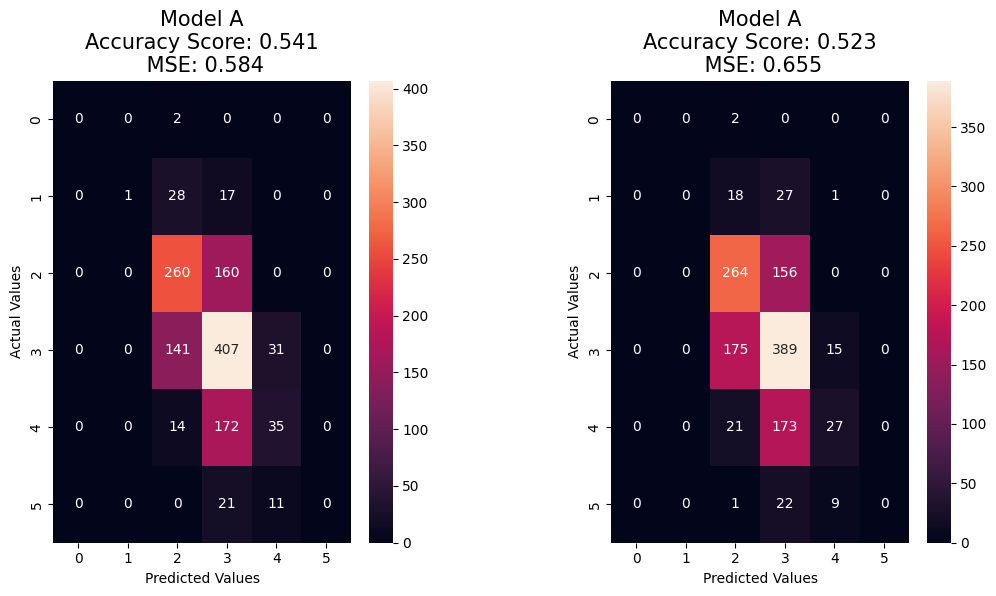

In [21]:
# Calculate the confusion matrix and accuracy score for Model A
predictions_A = y_pred_A
score_A = round(accuracy_score(A_y_test, predictions_A), 3)
score_A_mse = round(mean_squared_error(A_y_test, predictions_A), 3)
cm_A = confusion_matrix(A_y_test, predictions_A)

# Calculate the confusion matrix and accuracy score for Model B
predictions_B = y_pred_B
score_B = round(accuracy_score(B_y_test, predictions_B), 3)
score_B_mse = round(mean_squared_error(B_y_test, predictions_B), 3)
cm_B = confusion_matrix(B_y_test, predictions_B)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for Model A
sns.heatmap(cm_A, annot=True, fmt=".0f", ax=axes[0])
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Actual Values')
axes[0].set_title('Model A\nAccuracy Score: {0}'.format(score_A) +'\n MSE: {0}'.format(score_A_mse), size=15)

# Plot confusion matrix for Model B
sns.heatmap(cm_B, annot=True, fmt=".0f", ax=axes[1])
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Actual Values')
axes[1].set_title('Model A\nAccuracy Score: {0}'.format(score_B) +'\n MSE: {0}'.format(score_B_mse), size=15)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()

### 1.2.1 Árbol de regresión

Entrene un árbol de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

> a) max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.

> b) max_leaf_nodes: Probar con los valores 10, 50, 100. Describa brevemente qué es lo que significa modificar este hiperparámetro.

Responda las siguientes preguntas:

> c) ¿Cuántos modelos de árboles de regresión le quedan en total?

> d) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación de la grilla utilizando la métrica de evaluación $mean\_squared\_error$.

**Nota:** Recuerde que estos experimentos debe realizarlos para ambas representaciones de los conjuntos ($A$ y $B$).



In [22]:
# Define the model and the hyperparameter grid

cv_folds=KFold(n_splits=5, shuffle=True)

estimator = DecisionTreeRegressor(max_depth=2, 
                   max_leaf_nodes=10                
                   )

param_grid = {'max_depth': [2 , 20, 200], 
              'max_leaf_nodes': [10, 50, 100]
              }

hypereg = GridSearchCV(estimator, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

tree_regr_A = hypereg.fit(A_X_train, A_y_train.ravel())
y_pred_A_cont = tree_regr_A.predict(A_X_test)

tree_regr_B = hypereg.fit(B_X_train, B_y_train.ravel())
y_pred_B_cont = tree_regr_B.predict(B_X_test)

y_pred_B = np.round(y_pred_B_cont)
y_pred_A = np.round(y_pred_A_cont)


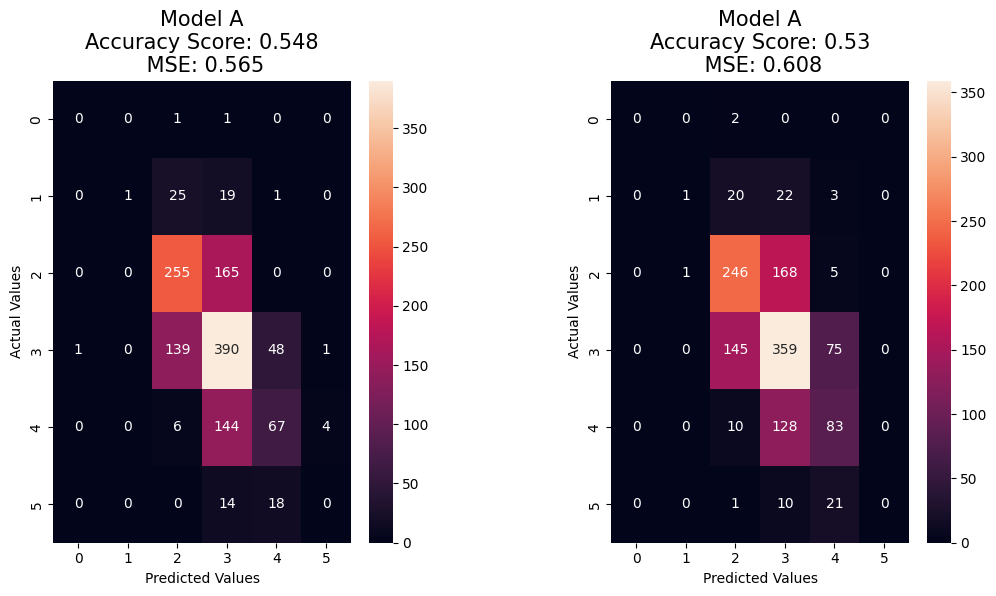

In [23]:
# Calculate the confusion matrix and accuracy score for Model A
predictions_A = y_pred_A
score_A = round(accuracy_score(A_y_test, predictions_A), 3)
score_A_mse = round(mean_squared_error(A_y_test, predictions_A), 3)
cm_A = confusion_matrix(A_y_test, predictions_A)

# Calculate the confusion matrix and accuracy score for Model B
predictions_B = y_pred_B
score_B = round(accuracy_score(B_y_test, predictions_B), 3)
score_B_mse = round(mean_squared_error(B_y_test, predictions_B), 3)
cm_B = confusion_matrix(B_y_test, predictions_B)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for Model A
sns.heatmap(cm_A, annot=True, fmt=".0f", ax=axes[0])
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Actual Values')
axes[0].set_title('Model A\nAccuracy Score: {0}'.format(score_A) +'\n MSE: {0}'.format(score_A_mse), size=15)

# Plot confusion matrix for Model B
sns.heatmap(cm_B, annot=True, fmt=".0f", ax=axes[1])
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Actual Values')
axes[1].set_title('Model A\nAccuracy Score: {0}'.format(score_B) +'\n MSE: {0}'.format(score_B_mse), size=15)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()

> c) Entrene el conjunto de entrenamiento completo con el mejor modelo y mejor representación ($A$ o $B$) obtenida y evalúe su desempeño sobre el conjunto de prueba utilizando la métrica de evaluación $mean\_squared\_error$.

\alert{PREGUNTAR A QUÉ SE REFIERE CON ESTOOOOO}

### 1.2.2 Random Forest Regressor

Entrene un bosque aleatorio de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.

* max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.

El objetivo de los métodos $\textit{ensemble machine}$ es combinar las predicciones de varios estimadores base construidos con un algoritmo de aprendizaje determinado para mejorar la capacidad de generalización / robustez respecto a un único estimador. Se suelen distinguir dos familias de métodos ensemble: los métodos $averaging$ y los métodos $boosting$. Respecto a lo anterior responda las siguientes preguntas:

> a) Defina con sus propias palabras qué son y en qué se diferencian los métodos $averaging$ y $boosting$.

> b) A cual de los dos anteriormente definidos pertenece el modelo de regresión Random Forest?

> c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

In [24]:
cv_folds=KFold(n_splits=5, shuffle=True)

estimator = RandomForestRegressor(max_depth=2, 
                   max_samples=0.1                
                   )

param_grid = {'max_depth': [2 , 20, 200], 
              'max_samples': [0.1, 0.5, 1.0]
              }

hypereg = GridSearchCV(estimator, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

rand_tree_regr_A = hypereg.fit(A_X_train, A_y_train.ravel())
y_pred_A_cont = rand_tree_regr_A.predict(A_X_test)

rand_tree_regr_B = hypereg.fit(B_X_train, B_y_train.ravel())
y_pred_B_cont = rand_tree_regr_B.predict(B_X_test)

y_pred_B = np.round(y_pred_B_cont)
y_pred_A = np.round(y_pred_A_cont)

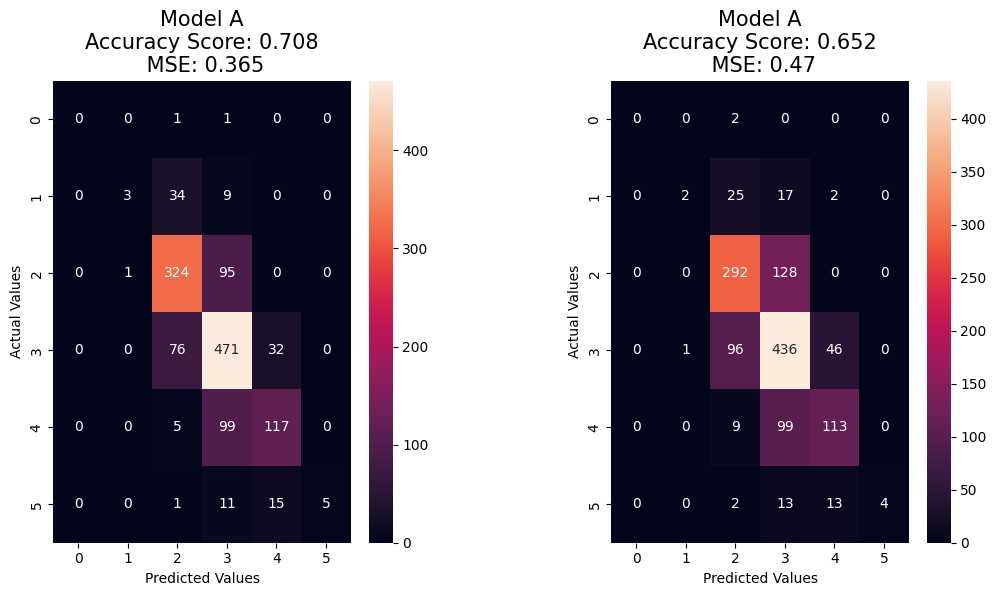

In [25]:
# Calculate the confusion matrix and accuracy score for Model A
predictions_A = y_pred_A
score_A = round(accuracy_score(A_y_test, predictions_A), 3)
score_A_mse = round(mean_squared_error(A_y_test, predictions_A), 3)
cm_A = confusion_matrix(A_y_test, predictions_A)

# Calculate the confusion matrix and accuracy score for Model B
predictions_B = y_pred_B
score_B = round(accuracy_score(B_y_test, predictions_B), 3)
score_B_mse = round(mean_squared_error(B_y_test, predictions_B), 3)
cm_B = confusion_matrix(B_y_test, predictions_B)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for Model A
sns.heatmap(cm_A, annot=True, fmt=".0f", ax=axes[0])
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Actual Values')
axes[0].set_title('Model A\nAccuracy Score: {0}'.format(score_A) +'\n MSE: {0}'.format(score_A_mse), size=15)

# Plot confusion matrix for Model B
sns.heatmap(cm_B, annot=True, fmt=".0f", ax=axes[1])
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Actual Values')
axes[1].set_title('Model B\nAccuracy Score: {0}'.format(score_B) +'\n MSE: {0}'.format(score_B_mse), size=15)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()

### 1.2.3 Bagging Regressor

Entrene un Bagging regresor utilizando como estimador (parámetro $estimator$) el mejor árbol de decisión obtenido en la pregunta 1.2.1, variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* n_estimators: Probar con 10, 100, 1000 estimadores. Describa brevemente qué es lo que significa modificar este hiperparámetro.

* max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.

Responda las siguientes preguntas

> a) ¿Cómo funciona el modelo Bagging?

> b) A qué familia de métodos pertenece el Bagging regresor: $averaging$ o $boosting$.

> c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

In [27]:
bas_estim = rand_tree_regr_A.best_estimator_
rand_tree_regr_A.best_estimator_

RandomForestRegressor(max_depth=200, max_samples=1.0)

In [32]:
cv_folds=KFold(n_splits=5, shuffle=True)

estimator = BaggingRegressor(estimator=bas_estim)

# Create your parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_samples': [0.1, 0.5, 1.0],
}

hypereg = GridSearchCV(estimator, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=2,
            n_jobs=-1 
            )
# Create the GridSearchCV object with refit=True
bagging_regr_A = hypereg.fit(A_X_train, A_y_train.ravel())
y_pred_A_cont = bagging_regr_A.predict(A_X_test)

bagging_regr_B = hypereg.fit(B_X_train, B_y_train.ravel())
y_pred_B_cont = bagging_regr_B.predict(B_X_test)

y_pred_B = np.round(y_pred_B_cont)
y_pred_A = np.round(y_pred_A_cont)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
# Calculate the confusion matrix and accuracy score for Model A
predictions_A = y_pred_A
score_A = round(accuracy_score(A_y_test, predictions_A), 3)
score_A_mse = round(mean_squared_error(A_y_test, predictions_A), 3)
cm_A = confusion_matrix(A_y_test, predictions_A)

# Calculate the confusion matrix and accuracy score for Model B
predictions_B = y_pred_B
score_B = round(accuracy_score(B_y_test, predictions_B), 3)
score_B_mse = round(mean_squared_error(B_y_test, predictions_B), 3)
cm_B = confusion_matrix(B_y_test, predictions_B)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for Model A
sns.heatmap(cm_A, annot=True, fmt=".0f", ax=axes[0])
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Actual Values')
axes[0].set_title('Model A\nAccuracy Score: {0}'.format(score_A) +'\n MSE: {0}'.format(score_A_mse), size=15)

# Plot confusion matrix for Model B
sns.heatmap(cm_B, annot=True, fmt=".0f", ax=axes[1])
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Actual Values')
axes[1].set_title('Model A\nAccuracy Score: {0}'.format(score_B) +'\n MSE: {0}'.format(score_B_mse), size=15)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()

## 1.3 Conclusiones

Comente con qué modelo y representación obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?

# 2. Reconocimiento de actividad humana mediante sensores de movimiento.

Los conjuntos de datos provienen del UCI Machine Learning Repository. En este conjuntos de datos cada persona realizó seis actividades (CWALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) llevando un smartphone en la cintura. Utilizando su acelerómetro y giroscopio integrados, capturamos la aceleración lineal de 3 ejes y la velocidad angular de 3 ejes a una frecuencia constante de 50 Hz. El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos, de los que se seleccionó el 70% de los voluntarios para generar los datos de entrenamiento y el 30% los datos de prueba.

<center><img src="https://imgtr.ee/images/2023/06/04/bSx54.jpg" alt="bSx54.jpg" border="0" width="480" height="480" /></center>

Para esta pregunta nos centraremos en la tarea de clasificación de actividades (variable objetivo) según los datos de movimiento proporcionados por los sensores (atributos).

Para cada registro en el conjunto de datos nos centraremos en:
* Aceleración triaxial del acelerómetro (aceleración total) y la aceleración estimada del cuerpo.
* Velocidad angular triaxial del giroscopio.

* Su etiqueta de actividad.

Para obtener el dataset, artículos publicados y más información, por favor dirigirse al siguiente [link](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).



## 2.1 Obtención, manipulación y exploración del conjunto de datos

Con el link proporcionado arriba, haga click en Data Folders y luego en *UCI HAR Dataset.names* para obtener una guía acerca de la estructura de los directorios. Descargue, descomprima los datos y explore la estructura de los directorios (*UCI HAR Dataset.zip*).

Para esta oportunidad solo nos centraremos en los dato que se encuentran en las carpetas *Inertial Signals*, para entrenamiento y pruebas.

### 2.1.1 Exploración del conjunto de datos

Una vez comprendida la estructura de los directorios, asegurese de poder navegar por los archivos correctamente:

> a) El código a continuación debe imprimir las rutas a todos los archivos del conjunto de datos que usted acaba de descargar. Ejemplo: /su ruta/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt

In [ ]:
import os

for dirname, _, filenames in os.walk(r'C:\INF-398\TAREA 2\UCI HAR Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\INF-398\TAREA 2\UCI HAR Dataset\.DS_Store
C:\INF-398\TAREA 2\UCI HAR Dataset\activity_labels.txt
C:\INF-398\TAREA 2\UCI HAR Dataset\features.txt
C:\INF-398\TAREA 2\UCI HAR Dataset\features_info.txt
C:\INF-398\TAREA 2\UCI HAR Dataset\README.txt
C:\INF-398\TAREA 2\UCI HAR Dataset\test\subject_test.txt
C:\INF-398\TAREA 2\UCI HAR Dataset\test\X_test.txt
C:\INF-398\TAREA 2\UCI HAR Dataset\test\y_test.txt
C:\INF-398\TAREA 2\UCI HAR Dataset\test\Inertial Signals\body_acc_x_test.txt
C:\INF-398\TAREA 2\UCI HAR Dataset\test\Inertial Signals\body_acc_y_test.txt
C:\INF-398\TAREA 2\UCI HAR Dataset\test\Inertial Signals\body_acc_z_test.txt
C:\INF-398\TAREA 2\UCI HAR Dataset\test\Inertial Signals\body_gyro_x_test.txt
C:\INF-398\TAREA 2\UCI HAR Dataset\test\Inertial Signals\body_gyro_y_test.txt
C:\INF-398\TAREA 2\UCI HAR Dataset\test\Inertial Signals\body_gyro_z_test.txt
C:\INF-398\TAREA 2\UCI HAR Dataset\test\Inertial Signals\total_acc_x_test.txt
C:\INF-398\TAREA 2\UCI HAR Dataset\test\Inertial Si

In [ ]:
LABELS = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
SIGNALS = ["body_acc_x_", "body_acc_y_", "body_acc_z_",
           "body_gyro_x_", "body_gyro_y_", "body_gyro_z_",
           "total_acc_x_", "total_acc_y_", "total_acc_z_"]

> b) Obtenga la ruta exacta de los archivos e insertelos en una lista (entrenamiento y prueba ). El código a continuación es solo una sugerencia, usted puede optimizar y modificarlo.

In [ ]:
train_paths = ['C:\INF-398\TAREA 2/UCI HAR Dataset/train/Inertial Signals/' + signal + 'train.txt' for signal in SIGNALS]
test_paths = ['C:\INF-398\TAREA 2/UCI HAR Dataset/test/Inertial Signals/' + signal + 'test.txt' for signal in SIGNALS]

> c) Cree una función __load_X que reciba una lista de rutas como alguna de las anteriormente creadas, y retorne un arreglo de numpy con las siguientes dimensiones (n_samples, signal_len, sensor) donde:
* n_samples: es el tamaño de la muestra, o sea, el total de experimentos.
* signal_len: es el largo de la señal de los sensores.
* sensor: es el sensor o el eje del sensor el cual registra la señal, por ejemplo acelerómetro en el eje $y$.


In [ ]:
def __load_X(X_signal_paths):
    X_signals = []    

    return np.array...

In [ ]:
x_train = __load_X(train_paths)
x_test = __load_X(test_paths)

> d) Cargue las clases del conjunto de entrenamiento y pruebas en arreglos numpy.

In [ ]:
y_train = np.loadtxt('/content/UCI HAR Dataset/train/y_train.txt',  dtype=np.int32)
y_test = np.loadtxt('/content/UCI HAR Dataset/test/y_test.txt', dtype=np.int32)

### 2.1.2 Análisis del conjunto de datos

Responda las siguientes preguntas:

> a) ¿Cuántos experimentos le quedan en el conjunto de entrenamiento y en el de test?

> b) ¿Qué valores obtiene para las dimensiones recién definidas (n_samples, signal_len, sensor)?

> c) Considerando todo lo que usted ha aprendido en este curso y en las tareas anteriores, ¿Qué puede decir de los atributos de este conjunto de datos?. Obtenga estadísticas descriptivas y sintetice brevemente con sus propias palabras lo que observe, apoyándose de gráficos como histográmas, boxplots heatmaps de correlación, etc.

> d) Si quisiera entrenar una red neuronal feedforward con este conjunto de datos, ¿cómo deben representarse las dimensiones de cada experimento (sample) para que sirvan de entrada para este tipo de red?

> e) Modifique las dimensiones de los atributos para luego entrenar una red neuronal feedforward.

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

> f) ¿Cómo quedó cada atributo ahora que modificó sus dimensiones?

### 2.1.3 Procesamiento del conjunto de datos

> a)Transforme las clases a One Hot Encoder

In [ ]:
onehot_encoder = OneHotEncoder(sparse_output=False)

y_train_OHE = onehot_encoder.fit_transform(y_train.reshape(len(y_train), 1))
y_test_OHE = onehot_encoder.transform(y_test.reshape(len(y_test), 1))

# Print the original labels and the one-hot encoded labels
print("Original Labels:")
print(y_train.shape)
print("\nOne-Hot Encoded Labels:")
print(y_train_OHE.shape)

Original Labels:
(7352,)

One-Hot Encoded Labels:
(7352, 6)


In [ ]:
LABELS[np.argmax(y_train_OHE[400])]

> b) ¿Estan bien balanceadas las clases?

> c) Estandarice los atributos con media 0 y variaza 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train)

# Apply the scaler to transform the training data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


## 2.2 Modelos de clasificación

### 2.2.1 Redes Neuronales

> a) ¿Cómo se entrena una red neuronal feedforward?

> b) ¿Qué es una neurona en este contexto?

> c) ¿Qué es una función de activación y para que sirven?

> d) ¿A qué se le llama capa densa?

> e) Si usted conoce la dimensión entrada, la de salida, la cantidad de capas y neuronas de cada capa, ¿cómo se calcula la cantidad de pesos de la red?

> f) ¿A qué se refiere el fenómeno de gradiente desvaneciente?, ¿y el gradiente explosivo?

> g) Para esta tarea, como debería ser la capa de salida de la red considerando que previemente aplicó una transformación One Hot Encoding a las clases del conjunto?

> h) Considere que la capa de entrada se llama "input_layer",  a la capa de salida le llamaremos "output_layer" y a las capas intermedias "hidden_layer(_units_, _activation_)" donde los parametros significan el numero de neuronas que tiene esa capa densa (Dense en Keras) y su activación. Cree las siguientes redes neuronales:

* input_layer -> output_layer

* input_layer -> hidden_layer(32, tanh) -> output_layer

* input_layer -> hidden_layer(32, sigmoid) -> output_layer

* input_layer -> hidden_layer(32, relu) -> output_layer

> i) Una vez creado el modelo, imprima el sumario (modelo.summary()) y compare los resultados obtenidos con su razonamiento explicado en la pregunta e).

In [ ]:
input_layer = Input(shape = (x_train.shape[1:]))

layer_1 = Dense(units=16, activation=relu)(input_layer)
layer_2 = Dense(units=64, activation=relu)(layer_1)
layer_3 = Dense(units=32, activation=relu)(layer_2)
layer_4 = Dense(units=16, activation=relu)(layer_3)
layer_5 = Dense(units=8, activation=relu)(layer_4)
output_layer = Dense(units=6, activation=softmax)(layer_1)

ANN = Model(inputs = input_layer , outputs = output_layer)

In [ ]:
ANN.summary()

 > j) Defina un callback de Early Stopping para evitar un sobre ajuste de la red basandose en sus respuestas a las siguientes preguntas:

* ¿Qué es lo que se debería monitorear para evitar el sobre ajuste en esta red?

* ¿Qué es la paciencia en este contexto?

* ¿Para qué se usa el parámetro min_delta?

> k) Compile el modelo usando como optimizador el gradiente descendente estocástico, utilice la métrica "categorical_accuracy" y responda lo siguiente:

* ¿Qúe función de pérdida se debe usar para este problema (loss)?

**Nota:** Si bien en un mundo ideal donde hay tiempo y recursos para explorar un subconjunto del espacio de hipótesis lo suficientemente amplio como para cubrir todas las posibles combinaciones de hiperparámetros, en esta tarea solo se explorarán algunos.

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy',mode='max', verbose=1, patience=50)
ANN.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])

> l) Entrene el modelo utilizando el callback definido en la pregunta anterior con 100 epochs,un batch_size=256, y validation split=0.1.

* ¿Qué significa el batch_size?

**Nota:** Por favor recuerde ocultar el output del entrenamiento!! Mantenga el orden de su tarea y justifique de forma óptima sus resultados.

In [ ]:
history = ANN.fit(x_train, y_train_OHE, 
                  batch_size=64, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop])

> m) Escoja el mejor modelo según la función de activación y puntuación obtenida en el conjunto de validación y pruebe con los siguientes modelos:

* input_layer -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(256, best_activ) -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

In [ ]:
"""
Su código aquí
"""

>n) Imprima las curvas de error y accuracy del conjunto de entrenamiento y de validación para observar como se comporta el _aprendizaje_ de sus modelos.

In [ ]:
import matplotlib.pyplot as plt

# Access the training and validation errors from the history object
train_errors = history.history['accuracy']
val_errors = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(train_errors) + 1)

# Plotting the learning curves
plt.plot(epochs, train_errors, label='Training Accuracy')
plt.plot(epochs, val_errors, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()

# Displaying the plot
plt.show()

> o) Una vez terminados los entrenamientos elija la mejor red hasta ahora y entrénela con el conjunto de entrenamiento completo sin validation split.

In [ ]:
"""
Su código aquí
"""

> p) Procese las predicciones del modelo sobre el conjunto de test para que pueda comparar los errores usando un heatmap de la matriz de confusión.

In [ ]:
y_pred = ANN(x_test)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_test_comp = np.argmax(y_test_OHE, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

cat = np.array([1,2,3,4,5,6])

# Create the confusion matrix
cm = confusion_matrix(cat[y_test_comp], cat[y_pred])

# Get the number of classes
num_classes = 6

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add x-axis and y-axis labels
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=75)
plt.yticks(tick_marks, LABELS)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Add axis labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.tight_layout()
plt.show()


> q) Comente acerca de los resultados y explique cual es la actividad que mejor logra clasificar la red.

### 2.2.2 AdaBoost y arbustos

> a) Describa brevemente como funciona el modelo AdaBoost.

> b) ¿Qué clasificador se puede usar junto con Adaboost?

> c) ¿Cómo funciona el _learning rate_ en el modelo AdaBoost?

> d) Separe el conjunto de entrenamiento dejando el 10% para validación.

> e) Entrene un clasificador AdaBoost con un arbusto (árbol de profundidad=2) con 300 estimadores y learning_rate=1

**Nota:** Este modelo no usa One Hot Encoder para las clases, investigue como preprocesar los datos del conjunto para entrenar este modelo. Puede guiarse con el siguiente tutorial de sklearn: https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py



In [ ]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

In [ ]:
ada.fit(x_train, y_train)

> f) Revise el error de validación con el conjunto de validaión.

In [ ]:
ada_errors = []

for ada_val_predict in ada.staged_predict(x_val):
    ada_val_errors.append(1.0 - accuracy_score(ada_val_predict, y_val))    

n_trees_ada = len(ada)

> g) Haga la misma prueba pero ahora con 30 estimadores

In [ ]:
...

> h) Una vez encontrado el mejor modelo basandose en el error de validación, entrene el mejr modelo con todo el conjunto de entrenamiento, es decir, sin hacer _validation split_ y luego evalúe el modelo sobre el conjunto de pruebas.

> i) Muestre la matriz de confusión y comente sus resultados.

## 2.3 Conclusiones

Comente con qué modelo obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?

